# DATA MADNESS

Ethical Considerations:

The use of data in all sectors has been a non-stop debate, where society has always questioned the ethical aspects of how our data should be used and whether advantages of using personal data outweigh the costs. The two elementary issues to be addressed when trying to ethically use data is to properly use the input and to properly use that output. Not only is it important to have the right inputs, but an honest approach in retrieving them cannot be overlooked as well. Thankfully here, The World Happiness report does as such. Likewise, misusing the results can have equally devastating consequences. That is why there is a fine line between using data for public good and misusing it. Before diving into data, countless factors need to be accounted for, from knowing the rights in regards to the dataset to disclosing the purpose of the data use. With an open and virtuous description on how this data is used, the prejudices of 'the untrustworthy' data analysis can slowly be dissipated. Then and only then can the use of data really start growing in the right direction, not only in terms of Happiness, but in almost every industry, owing to its endless potential.

Our use of The World Happiness data is for explanatory purposes. We are trying to explain why some countries are happier than others. This does not entail any personal privacy risks, thus there is very little ethical risks when at the individual level. Where ethics comes into consideration is when we draw our conclusions and the manor in which we explain a given countries happiness. There is a risk of being insensitive, biased and perhaps even racist. Throughout our work we had to be hyper aware of what conclusions we drew and how we got our message across

Please note, this notebook was developed to be run in Google Collab, feel free to play around with it there:

Collab link (some of the diagrams don't appear on github): https://colab.research.google.com/drive/1mhubeHGLrVHtMArnibjuWo0VAWZv7LVx?usp=sharing

Youtube link to our explanatory video: https://youtu.be/bLd4wNz5NxY

### Import data and libraries

In [ ]:
!pip install pandas==1.3.5
!pip install xlrd==1.2.0
!pip install geopandas
!pip install folium
!pip install mapclassify
!pip install sklearn
!pip install graphviz 


In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import io
from google.colab import files
import geopandas as geop
import folium
import mapclassify
from sklearn import tree
import graphviz 

In [ ]:
#only execute to upload a file
#upload all files in our "happiness" zipped data together
uploaded = files.upload()

The file uploaded was obtained from:

https://worldhappiness.report/ed/2021/

Please, see datamadness proposal for amore detailed description

In [4]:
data_features_per_country= pd.read_excel('Chapter2OnlineData.xls', sheet_name='Table2.1')
data_happy_scores = pd.read_excel('Chapter2OnlineData.xls', sheet_name='Figure2.6')

## Exploratory Data Analysis

### Features dataset

In [5]:
pd.set_option('display.max_columns', None)
data_features_per_country.head()

,Country name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-16","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014"
0,Afghanistan,2008,3.723590,7.168690,0.450662,50.799999,0.718114,0.177889,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,51.200001,0.678896,0.200178,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906,0.286315,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,2010,4.758381,7.386629,0.539075,51.599998,0.600127,0.134353,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318,0.275833,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,2011,3.831719,7.415019,0.521104,51.919998,0.495901,0.172137,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,2012,3.782938,7.517126,0.520637,52.240002,0.530935,0.244273,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This dataset contains different features about each country. For each country, it contains data for several years. We will work with the most recent year conatined in the data. First we are only going to filter rows and keep only those from our desired year

In [6]:
recent_year= 2015 #this is the most recent year in a dataset we will use later
df_feat= data_features_per_country.loc[data_features_per_country['Year']== recent_year]


 How many countries do we have? How many features are non null? What is the size of our dataframe? We call the info() method to find out.

In [7]:
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 7 to 1700
Data columns (total 26 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Country name                                              143 non-null    object 
 1   Year                                                      143 non-null    int64  
 2   Life Ladder                                               143 non-null    float64
 3   Log GDP per capita                                        139 non-null    float64
 4   Social support                                            142 non-null    float64
 5   Healthy life expectancy at birth                          140 non-null    float64
 6   Freedom to make life choices                              140 non-null    float64
 7   Generosity                                                138 non-null    float64
 8   Perceptions of corr

We can see that there are some features that only have nan values. Other features such as 'Most people can be trusted' are repeated and only vary in their year. Hence we clean the dataframe a bit and keep only the useful features. We also get rid of the 'Life Ladder' feature as it is quite subjective

In [8]:
cols = list(df_feat.columns)
indices_cols_to_keep = [0,1,3,4,5,6,7,8,9,10,11,14,15,17,18,25]
selected_cols= [cols[i] for i in indices_cols_to_keep]
df_feat= df_feat[selected_cols]
print(df_feat.columns)

Index(['Country name', 'Year', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Positive affect',
       'Negative affect', 'Confidence in national government',
       'Standard deviation of ladder by country-year',
       'Standard deviation/Mean of ladder by country-year',
       'GINI index (World Bank estimate), average 2000-16',
       'gini of household income reported in Gallup, by wp5-year',
       'Most people can be trusted, WVS round 2010-2014'],
      dtype='object')


### Target dataset

This dataset contains scores of happiness per country which was collected in a survey. Additionally it contains other features. We only want the features 'country' and 'happiness'

In [9]:
data_happy_scores = data_happy_scores[['Country', 'Happiness score']]
data_happy_scores.head()

,Country,Happiness score
0,Finland,7.7689
1,Denmark,7.6001
2,Norway,7.5539
3,Iceland,7.4936
4,Netherlands,7.4876


Let´s see what the distributions of happiness looks like:

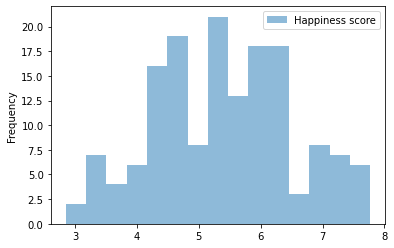

In [10]:
data_happy_scores.plot.hist(bins=15, alpha=0.5)


That is a strange ditribution! We are going to study why that is. But first we need to merge both dataframes and enrich them.

So far, we have a basic dataset that could help us encounter different factors that affect happiness. However, we could enrich our dataset even more. That is what we are going to do

<br>
We obtain this dataset from https://databank.worldbank.org/embed/happiness-data/id/1d38fdc3 

In [11]:
data_extra =  pd.read_excel('happiness data.xlsx')


In [12]:
#we do again a bit of cleaning
data_extra= data_extra.loc[data_extra['Time']== recent_year]
data_extra.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 2140 to 2353
Data columns (total 34 columns):
 #   Column                                                                                                 Non-Null Count  Dtype  
---  ------                                                                                                 --------------  -----  
 0   Time                                                                                                   214 non-null    object 
 1   Time Code                                                                                              214 non-null    object 
 2   Country Name                                                                                           214 non-null    object 
 3   Country Code                                                                                           214 non-null    object 
 4   CO2 emissions (kg per PPP $ of GDP) [EN.ATM.CO2E.PP.GD]                                       

In [13]:
#we drop columns with more than 30% non null values as it makes no sense to keep them
perc = 30.0
min_count =  int(((100-perc)/100)*data_extra.shape[0] + 1)
data_extra = data_extra.dropna( axis=1, 
                thresh=min_count)


Now we join all 3 datasets. The 2 datasets with feautres and the target dataset

In [14]:
data_extra['Country']= data_extra['Country Name']
data_extra.drop('Country Name', axis=1, inplace=True) 


In [ ]:
df_feat['Country']= df_feat['Country name']
df_feat.drop('Country name', axis=1, inplace=True) 
result=pd.merge(data_extra, df_feat, on='Country')
result=pd.merge(result, data_happy_scores, on='Country')
data= result #from this point onwards our df will be called data and it contains all the info we need
data['country_index']=data['Country']
data.set_index('country_index', inplace=True)

#we will also make the index match the country column which will allow us to query data faster in the future
#print(data.head())
data.info()

### How is happiness distributed throughout the different countries?

In [16]:
## we load the world_map shape object.  It was obtained from the following website: http://www.naturalearthdata.com/downloads/110m-cultural-vectors/110m-admin-0-countries/
world_map_data = geop.read_file('ne_110m_admin_0_countries.shp')
world_map_data = world_map_data[['NAME', 'geometry']]
#world_map_data.plot()
#print(world_map_data.head())


for items in data['Country'].tolist():
  data_map = world_map_data['NAME'].tolist()
  if items in data_map:
    pass
  else:
      print(items + ' is not in the world map data list')



Bahrain is not in the world map data list
Bosnia and Herzegovina is not in the world map data list
Czech Republic is not in the world map data list
Dominican Republic is not in the world map data list
Malta is not in the world map data list
Singapore is not in the world map data list
South Sudan is not in the world map data list
United States is not in the world map data list


In [17]:
#fix the ones missing
world_map_data.loc[4,'NAME'] = 'United States'
world_map_data.loc[153,'NAME'] = 'Czech Republic'
world_map_data.loc[176,'NAME']= 'South Sudan'
world_map_data.loc[170,'NAME']= 'Bosnia and Herzegovina'
#for i in range(len(world_map_data['NAME'].tolist())):
#  print(str(i) + ' '+ world_map_data.loc[i,'NAME'])
#print(*world_map_data['NAME'].tolist())

In [18]:
world_map_data.rename(columns= {'NAME': 'Country'} , inplace= True)
combined_map = world_map_data.merge(data, on = 'Country', how='inner')

Text(0.5, 1.0, 'Happiness per country')

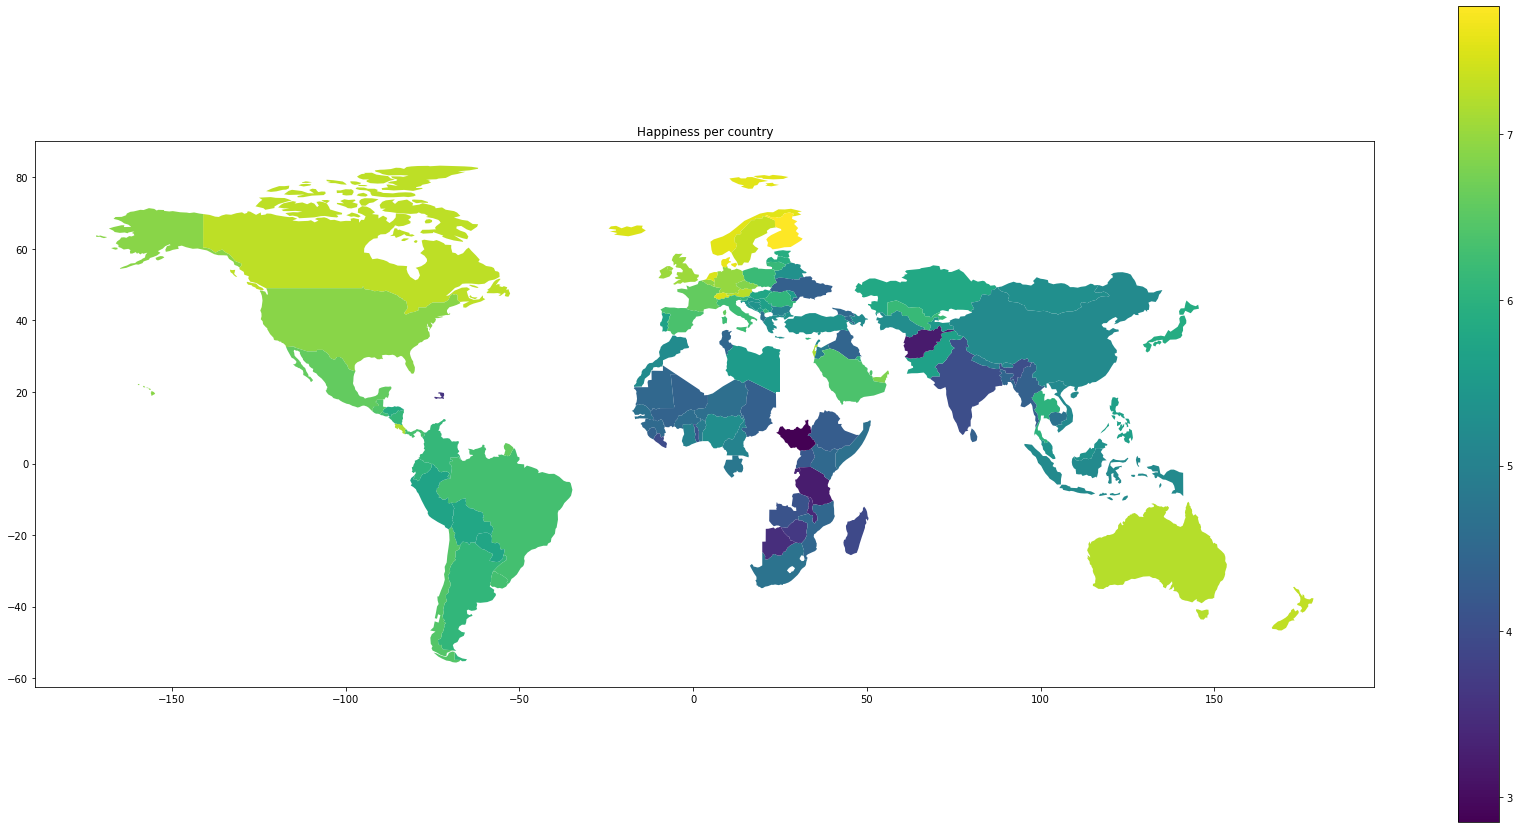

In [19]:

ax=combined_map.plot('Happiness score',  missing_kwds={'color': 'lightgrey'},
    legend=True, figsize=(30,15), markersize=100
    )
ax.set_title('Happiness per country')
#plt.title('Happiness score per country')

It looks like richer countries are happier. Is that always the case? Before moving to more in depth analysis we plot gdp per capita to check if this is always true

Text(0.5, 1.0, 'GDP per capita')

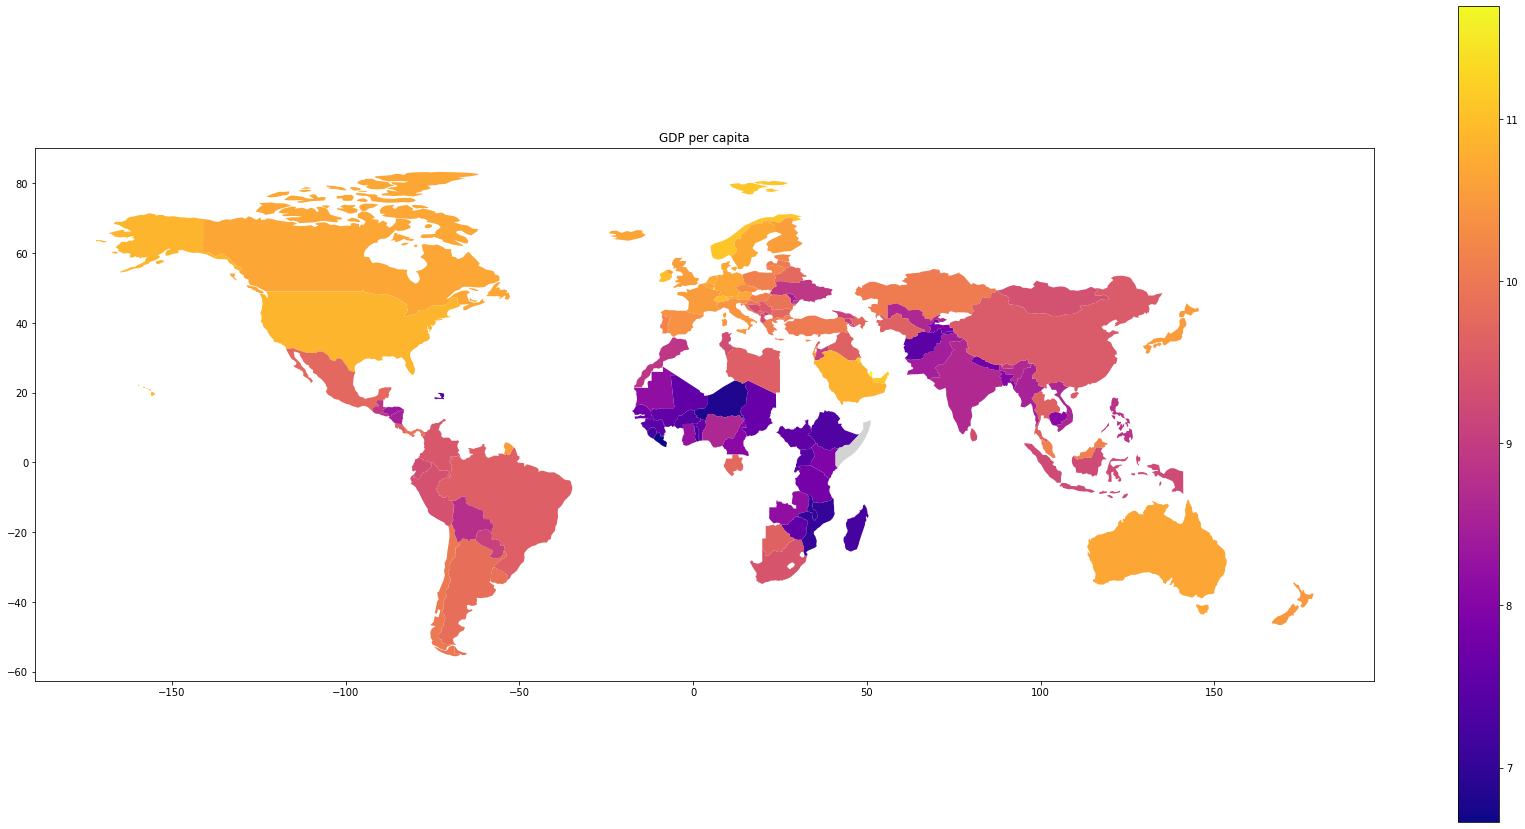

In [20]:
ax=combined_map.plot('Log GDP per capita',  missing_kwds={'color': 'lightgrey'},
    legend=True, figsize=(30,15), markersize=100, cmap='plasma'
    )
ax.set_title('GDP per capita')

We can see that indeed GDP per capita correlates with happiness but it is not the only factor. For instance, the US is richer than Canada, yet, Canada is a happier country. Why is this? Let´s first see how different factors correlate with happiness. (See below)

###Find correlation between all variables and Happiness score

Text(0.5, 1.0, 'Absolute value of correlation of different variables with happiness score')

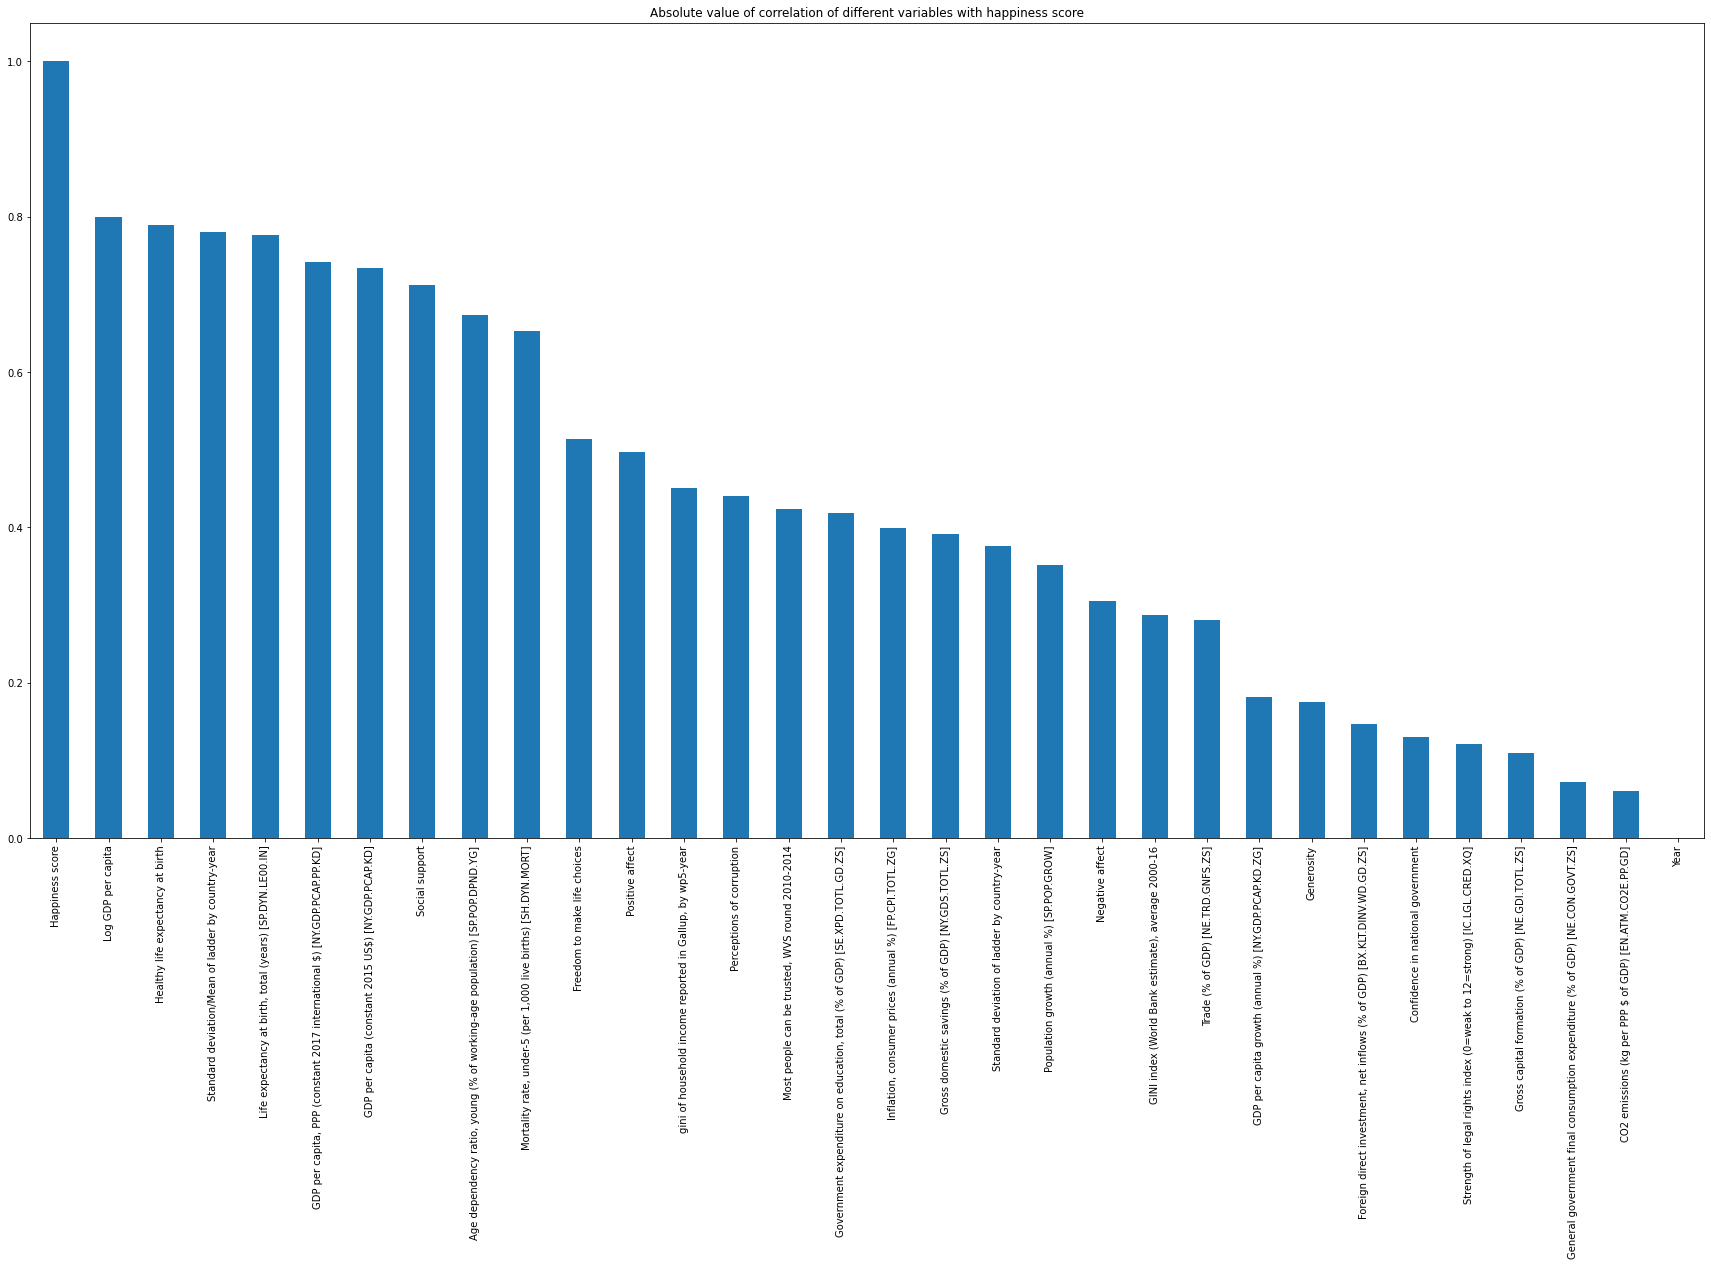

In [21]:
happy_corr =(data.corrwith(data["Happiness score"])).abs()
happy_corr= happy_corr.sort_values(ascending=False)
plt.figure(figsize=(30,15))
ax = happy_corr.plot.bar(x='Feature', y='Correlation with happiness score', rot=0)
plt.xticks(rotation=90)
plt.title('Absolute value of correlation of different variables with happiness score')

#print(happy_corr)

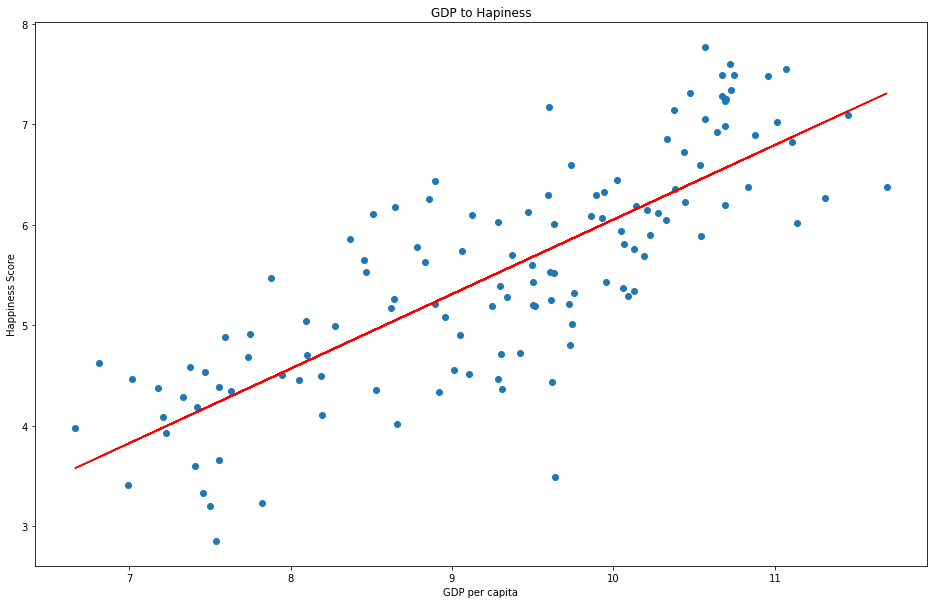

In [22]:
from matplotlib import pyplot as plt
from scipy.stats import linregress
import seaborn as sns

new_data = data[data['Log GDP per capita'].notna()]
x = new_data['Log GDP per capita']
y = new_data['Happiness score']

plt.figure(figsize=(16,10))
plt.scatter(x,y)
m, b = np.polyfit(x, y, 1)

#add linear regression line to scatterplot 
plt.plot(x, m*x+b, color='red')
plt.xlabel("GDP per capita")
plt.ylabel("Happiness Score")
plt.title("GDP to Hapiness")
plt.show()

#import seaborn as sns
#sns.regplot(x=x, y=y, data=data, logistic=True, ci=None, scatter_kws={'color': 'black'}, line_kws={'color': 'red'})

In [23]:
#Changing data
clusterData = new_data[['Log GDP per capita','Happiness score']]
#clusterData['Log GDP per capita'].isnull().values.any()
clusterData.head()
#data.head()

,Log GDP per capita,Happiness score
country_index,,
Afghanistan,7.500539,3.2033
Albania,9.302960,4.7186
Argentina,9.858329,6.0863
Armenia,9.011394,4.5594
Australia,10.690199,7.2280


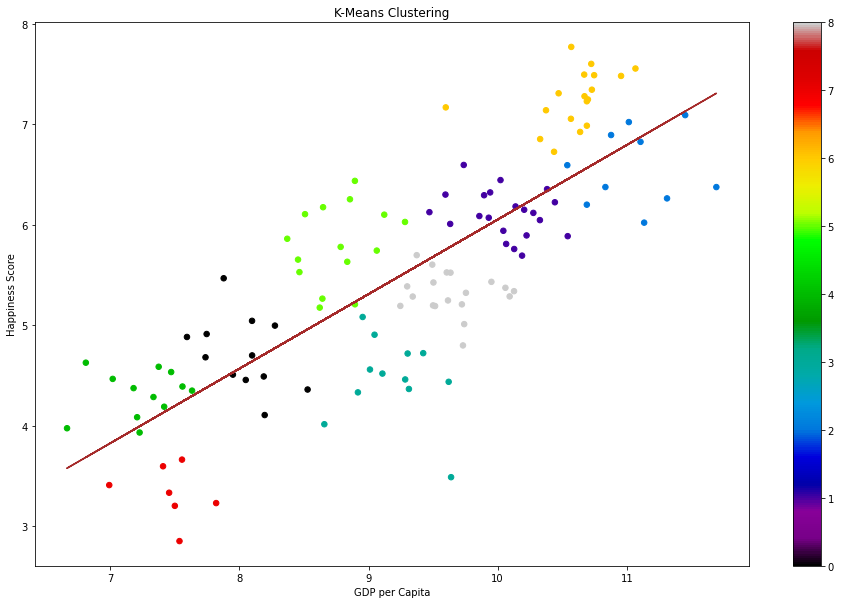

In [24]:
# IN this part I will cluster the data in groups above or below the trend 
from sklearn.preprocessing import StandardScaler  # For scaling dataset
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation #For clustering
from sklearn.mixture import GaussianMixture #For GMM clustering
#ss = StandardScaler()
#ss.fit_transform(data)


#K means Clustering 
def doKmeans(X, nclust=3):
    model = KMeans(nclust, random_state=0)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(clusterData, 9)
kmeans = pd.DataFrame(clust_labels)
if 'kmeans' in new_data:
  new_data.drop(['kmeans'], axis=1, inplace=True)
new_data.insert((clusterData.shape[1]),'kmeans',kmeans)

#Plot the clusters obtained using k means
plt.rcParams["figure.figsize"] = [16, 10]
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(clusterData['Log GDP per capita'],clusterData['Happiness score'],
                     c=kmeans[0],s=30, cmap = 'nipy_spectral')
ax.set_title('K-Means Clustering')


m, b = np.polyfit(x, y, 1)
#add linear regression line to scatterplot 
ax.plot(x, m*x+b, color='brown')

ax.set_xlabel('GDP per Capita')
ax.set_ylabel('Happiness Score')
plt.colorbar(scatter)


From this data we can compare the different groups and what causes the change in similar GDP ranges. Here's an example of that distribution (Needs to BE updated since tweaks have been added)

> Indented block


![](https://drive.google.com/uc?export=view&id=1r4RO2WGsyRxO07efKVnreBY5kfgOkRbT)






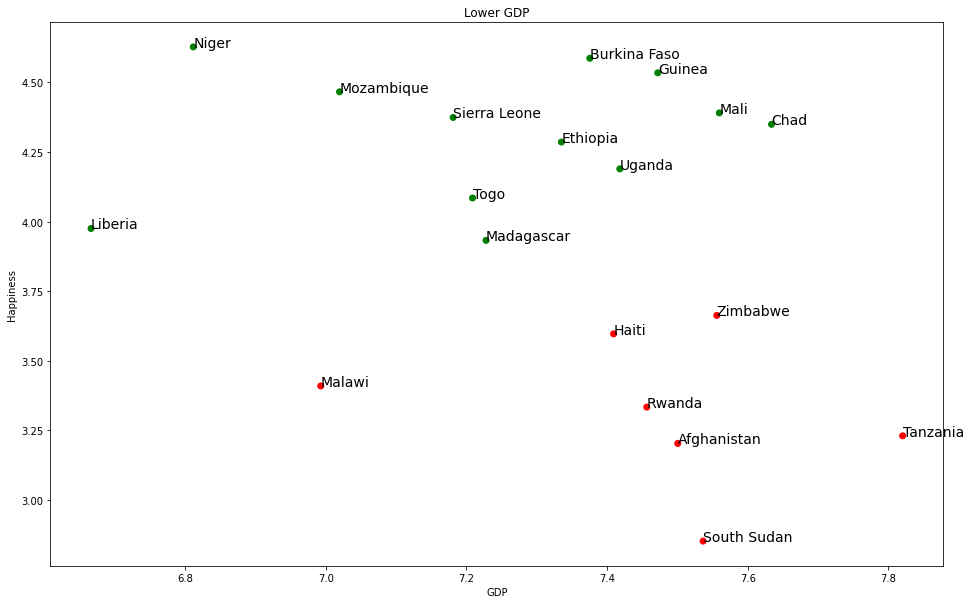

In [25]:

# Here we have each of the countries and their cluster based on the countries
# What can be done now is do a chart with the only countries in cluster a and b 
# Do second chart only with countries in cluster c and d
# In these two charts do a correlation to find the other factor playing a most important role 

data_n = new_data[(new_data['kmeans']==7) | (new_data['kmeans']==4)]

# set color
def pltcolor(lst):
    cols=[]
    for l in lst:
        if l==7:
            cols.append('red')
        elif l==4:
            cols.append('green')
        else:
          cols.append('orange')
    return cols
# Create the colors list using the function above
cols=pltcolor(data_n['kmeans'])

fig, ax = plt.subplots()
ax.scatter(data_n['Log GDP per capita'], data_n['Happiness score'], c=cols)
ax.set_xlabel('GDP')
ax.set_ylabel('Happiness')
ax.set_title('Lower GDP')

for i, txt in enumerate(data_n.index):
    ax.annotate(txt, (data_n['Log GDP per capita'][i], data_n['Happiness score'][i]), size=14)

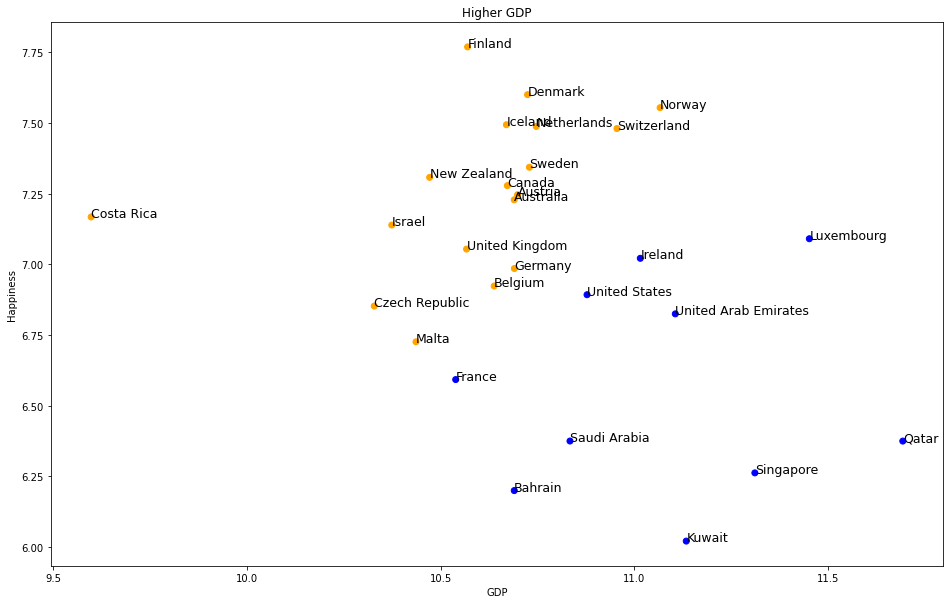

In [26]:
# We apply the same procedure for the two higher GDP's

data_n = new_data[(new_data['kmeans']==6) | (new_data['kmeans']==2)]

# set color
def pltcolor(lst):
    cols=[]
    for l in lst:
        if l==6:
            cols.append('orange')
        elif l==2:
            cols.append('blue')
        else:
          cols.append('orange')
    return cols
# Create the colors list using the function above
cols=pltcolor(data_n['kmeans'])
fig, ax = plt.subplots()
ax.scatter(data_n['Log GDP per capita'], data_n['Happiness score'], c=cols)
ax.set_xlabel('GDP')
ax.set_ylabel('Happiness')
ax.set_title('Higher GDP')


for i, txt in enumerate(data_n.index):
    ax.annotate(txt, (data_n['Log GDP per capita'][i], data_n['Happiness score'][i]), size=12.5)

Note: The parentheses are to label whether a bigger or lower value is preferable (up or low respectively), as it does vary through variables. 


Groupings: 

Economy - General Gov consumption(up),  Foreign Investment(up), Trade(up), Inflation(low), Capital Formation (up)

Health - Life expectancy at Birth(up), Mortality Rate(low), healthy life expected at birth, CO2 Emissions(low)

Education - Expenditure on education(up), Age dependency ratio (up)

People - Generosity(up), People Trusted(up)

social support- Social Support(up)

Income - Gross Domestic Savings(up), GDP per capita PPP (up)

Equality and freedom - Gini Index(low), Freedom to make life choices(up), Strength of Legal rights (up)

Institutional trust - Perceptions of corruption(low), Confidence in government  (up)

Happiness (we do not include this one)- Life Ladder(high), Positive Affect(high), Negative Affect(low)  - non included

Others/Irrelevant: population growth, Gini of household, std of ladder, gdp per capita, country, year, time, time code, country code

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


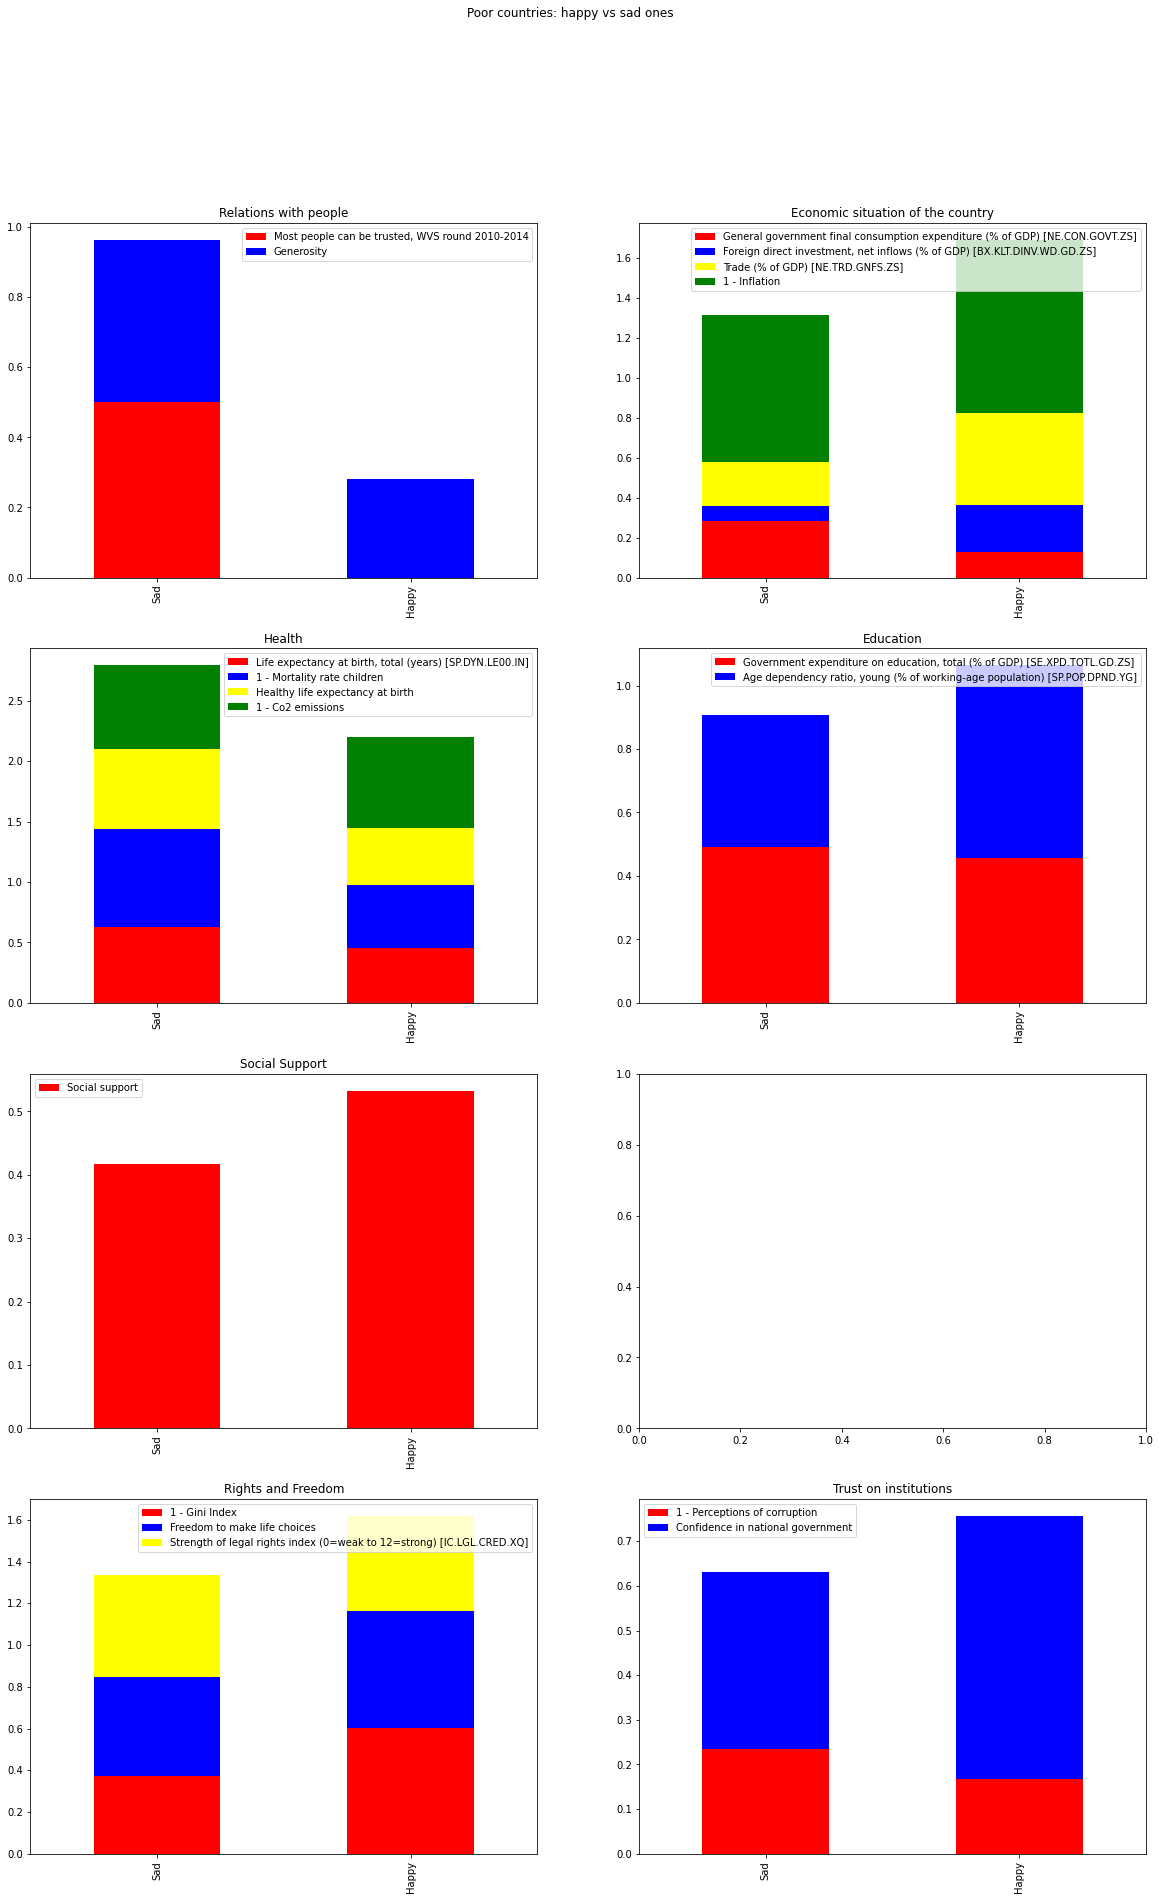

"\ntest2 = test1.mean()\nx = ['Education: Expenditure and % Working Age', 'People: Social Support, Generosity, People Trusted', 'Income: Savings and GDP Per capita']\n\n\ny1 = [test2['Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]'], test2['Social support'], test2['Gross domestic savings (% of GDP) [NY.GDS.TOTL.ZS]']]\ny2 = [test2['Age dependency ratio, young (% of working-age population) [SP.POP.DPND.YG]'], test2['Generosity'], test2['GDP per capita, PPP (constant 2017 international $) [NY.GDP.PCAP.PP.KD]']]\ny3 = [0, test2['Most people can be trusted, WVS round 2010-2014'], 0]\n  \n# plot bars in stack manner\nplt.bar(x, y1, color='r')\nplt.bar(x, y2, bottom=y1, color='b')\nplt.bar(x, y3, bottom=y2, color='g')\n"

In [27]:
from pandas.core.resample import PeriodIndexResampler
#we define groups
economy = ['General government final consumption expenditure (% of GDP) [NE.CON.GOVT.ZS]', 'Foreign direct investment, net inflows (% of GDP) [BX.KLT.DINV.WD.GD.ZS]', 'Trade (% of GDP) [NE.TRD.GNFS.ZS]', '1 - Inflation']
health = ['Life expectancy at birth, total (years) [SP.DYN.LE00.IN]', '1 - Mortality rate children', 'Healthy life expectancy at birth', '1 - Co2 emissions' ]
education = ['Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]', 'Age dependency ratio, young (% of working-age population) [SP.POP.DPND.YG]']
people =['Most people can be trusted, WVS round 2010-2014', 'Generosity']
social_support =['Social support']
money = ['Gross domestic savings (% of GDP) [NY.GDS.TOTL.ZS]', 'GDP per capita, PPP (constant 2017 international $) [NY.GDP.PCAP.PP.KD]', ]
equality_and_freedom =['1 - Gini Index', 'Freedom to make life choices', 'Strength of legal rights index (0=weak to 12=strong) [IC.LGL.CRED.XQ]' ]
institutional_trust=['1 - Perceptions of corruption', 'Confidence in national government']




## The idea works great but we need to normalize and then we are set :)
test1 = new_data[(new_data['kmeans'].isin([4,7]))]
test1.drop(['Country Code', 'Country','Time Code', 'Time' ], axis=1, inplace=True)
test1['Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]'].fillna((test1['Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]'].mean()), inplace=True)
#we normalize the data. We need to normalize all at the same time!
test1=(test1-test1.min())/(test1.max()-test1.min())
#now kmeans 0 equals 3 and kmeans 1 equals 4


#for the variables for which a low variable means good we create a new feature that is equal to 1- original feature
test1['1 - Inflation'] =1 - test1['Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]']
test1['1 - Mortality rate children'] = 1- test1['Mortality rate, under-5 (per 1,000 live births) [SH.DYN.MORT]']
test1['1 - Co2 emissions'] =1- test1['CO2 emissions (kg per PPP $ of GDP) [EN.ATM.CO2E.PP.GD]']
test1['1 - Gini Index'] =1- test1['GINI index (World Bank estimate), average 2000-16']
test1['1 - Perceptions of corruption'] =1- test1['Perceptions of corruption']

#test2 = test1.mean()

df_poor_happy = test1[test1['kmeans']==0].mean()
df_poor_sad = test1[test1['kmeans']==1].mean()


economy_poor_happy= df_poor_happy[economy]
economy_poor_sad= df_poor_sad[economy]
economy_df = pd.concat([economy_poor_sad, economy_poor_happy], axis=1)

health_poor_happy= df_poor_happy[health]
health_poor_sad= df_poor_sad[health]
health_df = pd.concat([health_poor_sad, health_poor_happy], axis=1)

education_poor_happy= df_poor_happy[education]
education_poor_sad= df_poor_sad[education]
education_df = pd.concat([education_poor_sad, education_poor_happy], axis=1)

people_poor_happy= df_poor_happy[people]
people_poor_sad= df_poor_sad[people]
people_df = pd.concat([people_poor_sad, people_poor_happy], axis=1)

social_support_poor_happy= df_poor_happy[social_support]
social_support_poor_sad= df_poor_sad[social_support]
social_support_df = pd.concat([social_support_poor_sad, social_support_poor_happy], axis=1)

money_poor_happy= df_poor_happy[money]
money_poor_sad= df_poor_sad[money]
money_df = pd.concat([money_poor_sad, money_poor_happy], axis=1)

equality_and_freedom_poor_happy= df_poor_happy[equality_and_freedom]
equality_and_freedom_poor_sad= df_poor_sad[equality_and_freedom]
equality_and_freedom_df = pd.concat([equality_and_freedom_poor_sad, equality_and_freedom_poor_happy], axis=1)

institutional_trust_poor_happy= df_poor_happy[institutional_trust]
institutional_trust_poor_sad= df_poor_sad[institutional_trust]
institutional_trust_df = pd.concat([institutional_trust_poor_sad, institutional_trust_poor_happy], axis=1)


list_df = [economy_df,health_df , education_df, people_df, social_support_df, money_df, equality_and_freedom_df, institutional_trust_df ]
for df in list_df:
  df.columns= ['Sad', 'Happy']

#plt.bar(x, equality_and_freedom_df , stacked=True, color=['red', 'green', 'blue'])
#equality_and_freedom_df.T.plot(kind='bar', stacked=True, color=['red', 'pink', 'yellow'])
#people_df.T.plot(kind='bar', stacked=True, color=['red', 'pink', 'yellow'])


fig, axs = plt.subplots(4, 2)
fig.suptitle('Poor countries: happy vs sad ones')
fig.set(figheight=30, figwidth=20)

people_df.T.plot(kind='bar', stacked=True, color=['red', 'blue', 'yellow', 'green', 'pink'], ax= axs[0, 0])
axs[0, 0].set_title('Relations with people')
economy_df.T.plot(kind='bar', stacked=True, color=['red', 'blue', 'yellow', 'green', 'pink'], ax= axs[0, 1])
axs[0, 1].set_title('Economic situation of the country')
health_df.T.plot(kind='bar', stacked=True, color=['red', 'blue', 'yellow', 'green', 'pink'], ax= axs[1, 0])
axs[1, 0].set_title('Health')
education_df.T.plot(kind='bar', stacked=True, color=['red', 'blue', 'yellow', 'green', 'pink'], ax= axs[1, 1])
axs[1, 1].set_title('Education')
social_support_df.T.plot(kind='bar', stacked=True, color=['red', 'blue', 'yellow', 'green', 'pink'], ax= axs[2, 0])
axs[2, 0].set_title('Social Support')
# money_df.T.plot(kind='bar', stacked=True, color=['red', 'blue', 'yellow', 'green', 'pink'], ax= axs[2, 1])
# axs[2, 1].set_title('Microeconomics')
equality_and_freedom_df.T.plot(kind='bar', stacked=True, color=['red', 'blue', 'yellow', 'green', 'pink'], ax= axs[3, 0])
axs[3, 0].set_title('Rights and Freedom')
institutional_trust_df.T.plot(kind='bar', stacked=True, color=['red', 'blue', 'yellow', 'green', 'pink'], ax= axs[3, 1])
axs[3, 1].set_title('Trust on institutions')




# Hide x labels and tick labels for top plots and y ticks for right plots.
#for ax in axs.flat:
#   ax.label_outer()

plt.show()

#plt.bar(x, y2, bottom=y1, color='b')
#plt.bar(x, y3, bottom=y2, color='g')

"""
test2 = test1.mean()
x = ['Education: Expenditure and % Working Age', 'People: Social Support, Generosity, People Trusted', 'Income: Savings and GDP Per capita']


y1 = [test2['Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]'], test2['Social support'], test2['Gross domestic savings (% of GDP) [NY.GDS.TOTL.ZS]']]
y2 = [test2['Age dependency ratio, young (% of working-age population) [SP.POP.DPND.YG]'], test2['Generosity'], test2['GDP per capita, PPP (constant 2017 international $) [NY.GDP.PCAP.PP.KD]']]
y3 = [0, test2['Most people can be trusted, WVS round 2010-2014'], 0]
  
# plot bars in stack manner
plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')
plt.bar(x, y3, bottom=y2, color='g')
"""




### Now we perform the exact same analysis but for richer countries

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


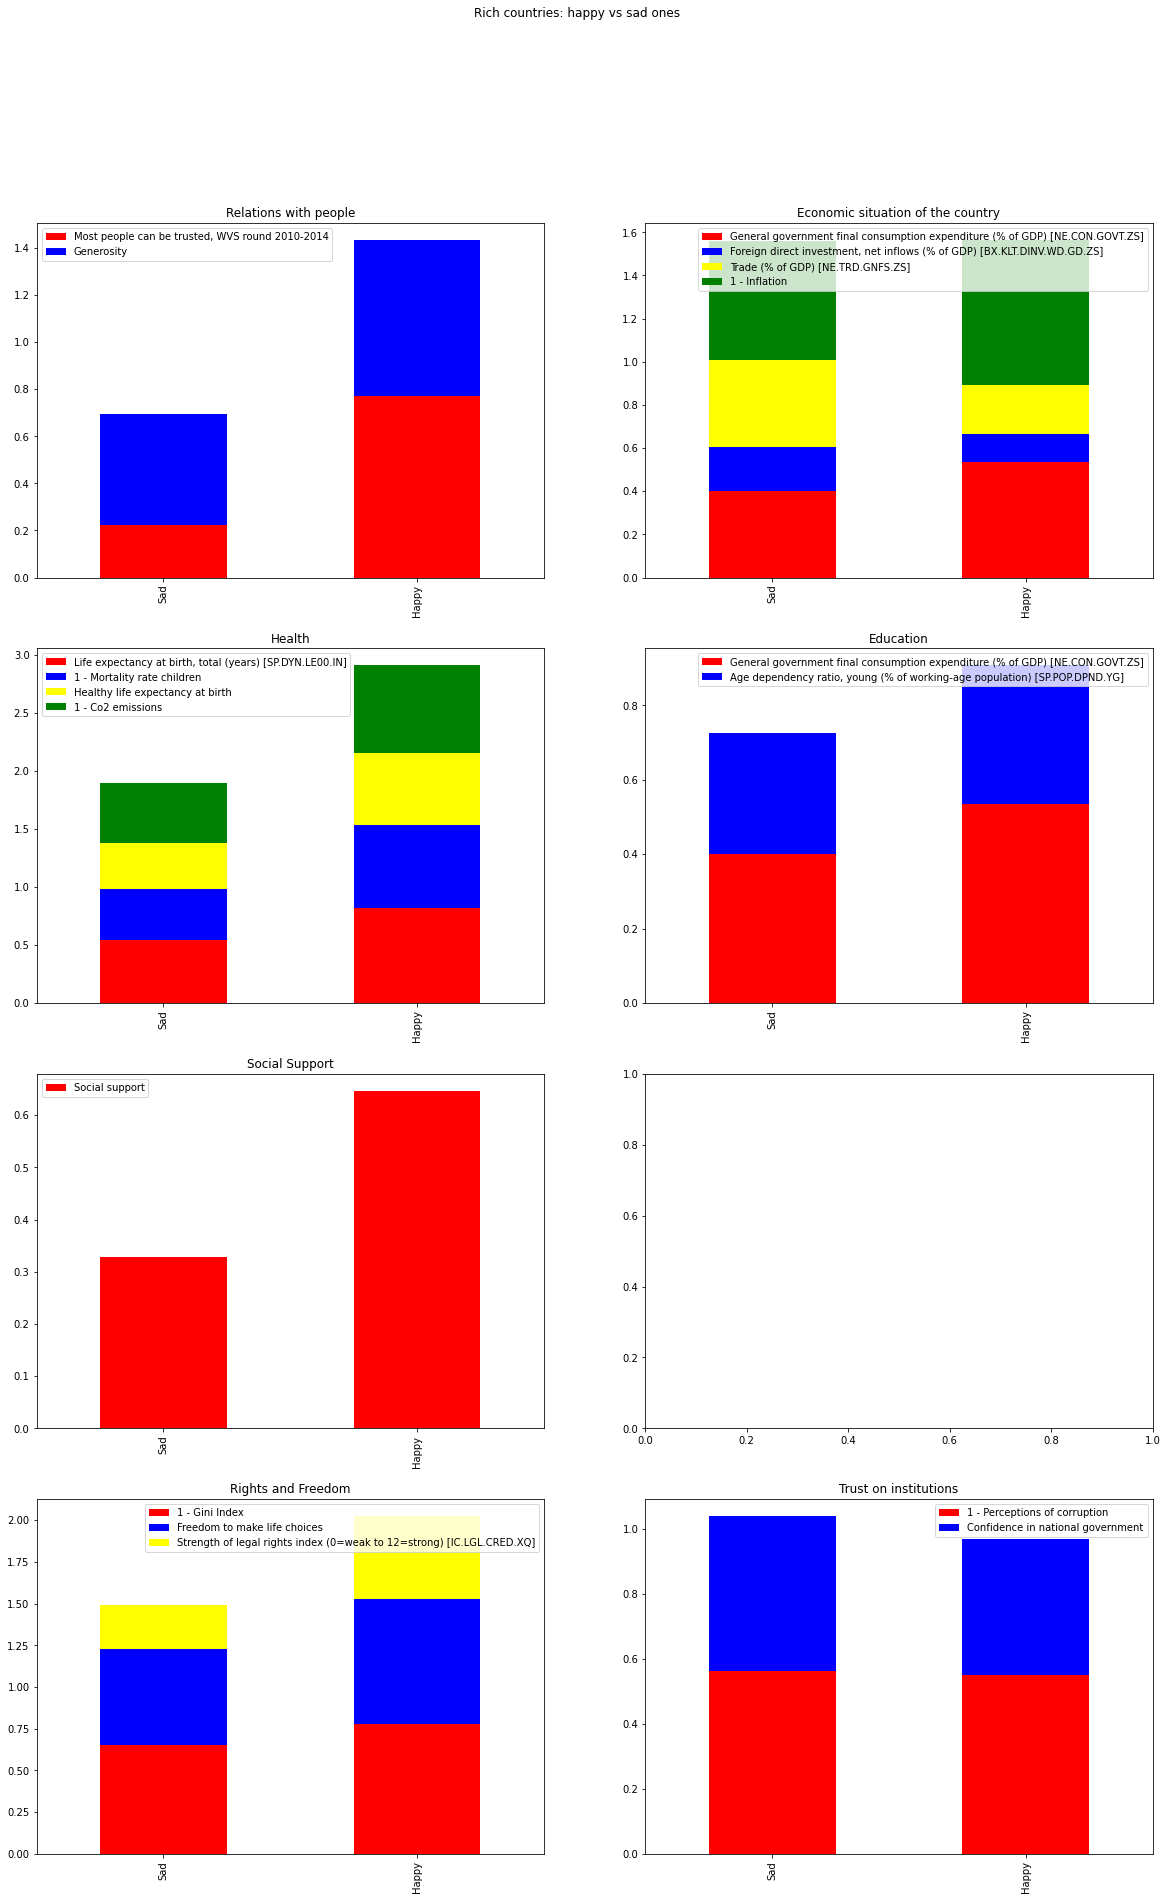

"\ntest2 = test1.mean()\nx = ['Education: Expenditure and % Working Age', 'People: Social Support, Generosity, People Trusted', 'Income: Savings and GDP Per capita']\n\n\ny1 = [test2['Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]'], test2['Social support'], test2['Gross domestic savings (% of GDP) [NY.GDS.TOTL.ZS]']]\ny2 = [test2['Age dependency ratio, young (% of working-age population) [SP.POP.DPND.YG]'], test2['Generosity'], test2['GDP per capita, PPP (constant 2017 international $) [NY.GDP.PCAP.PP.KD]']]\ny3 = [0, test2['Most people can be trusted, WVS round 2010-2014'], 0]\n  \n# plot bars in stack manner\nplt.bar(x, y1, color='r')\nplt.bar(x, y2, bottom=y1, color='b')\nplt.bar(x, y3, bottom=y2, color='g')\n"

In [28]:
from pandas.core.resample import PeriodIndexResampler
#we define groups
economy = ['General government final consumption expenditure (% of GDP) [NE.CON.GOVT.ZS]', 'Foreign direct investment, net inflows (% of GDP) [BX.KLT.DINV.WD.GD.ZS]', 'Trade (% of GDP) [NE.TRD.GNFS.ZS]', '1 - Inflation']
health = ['Life expectancy at birth, total (years) [SP.DYN.LE00.IN]', '1 - Mortality rate children', 'Healthy life expectancy at birth', '1 - Co2 emissions' ]
education = ['General government final consumption expenditure (% of GDP) [NE.CON.GOVT.ZS]', 'Age dependency ratio, young (% of working-age population) [SP.POP.DPND.YG]']
people =['Most people can be trusted, WVS round 2010-2014', 'Generosity']
social_support =['Social support']
money = ['Gross domestic savings (% of GDP) [NY.GDS.TOTL.ZS]', 'GDP per capita, PPP (constant 2017 international $) [NY.GDP.PCAP.PP.KD]', ]
equality_and_freedom =['1 - Gini Index', 'Freedom to make life choices', 'Strength of legal rights index (0=weak to 12=strong) [IC.LGL.CRED.XQ]' ]
institutional_trust=['1 - Perceptions of corruption', 'Confidence in national government']




## The idea works great but we need to normalize and then we are set :)
test1 = new_data[(new_data['kmeans'].isin([6,2]))]
test1.drop(['Country Code', 'Country','Time Code', 'Time' ], axis=1, inplace=True)
test1['Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]'].fillna((test1['Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]'].mean()), inplace=True)
#we normalize the data. We need to normalize all at the same time!
test1=(test1-test1.min())/(test1.max()-test1.min())
#now kmeans 0 equals 3 and kmeans 1 equals 4


#for the variables for which a low variable means good we create a new feature that is equal to 1- original feature
test1['1 - Inflation'] =1 - test1['Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]']
test1['1 - Mortality rate children'] = 1- test1['Mortality rate, under-5 (per 1,000 live births) [SH.DYN.MORT]']
test1['1 - Co2 emissions'] =1- test1['CO2 emissions (kg per PPP $ of GDP) [EN.ATM.CO2E.PP.GD]']
test1['1 - Gini Index'] =1- test1['GINI index (World Bank estimate), average 2000-16']
test1['1 - Perceptions of corruption'] =1- test1['Perceptions of corruption']

#test2 = test1.mean()

df_rich_happy = test1[test1['kmeans']==1].mean()
df_rich_sad = test1[test1['kmeans']==0].mean()


economy_rich_happy= df_rich_happy[economy]
economy_rich_sad= df_rich_sad[economy]
economy_df = pd.concat([economy_rich_sad, economy_rich_happy], axis=1)

health_rich_happy= df_rich_happy[health]
health_rich_sad= df_rich_sad[health]
health_df = pd.concat([health_rich_sad, health_rich_happy], axis=1)

education_rich_happy= df_rich_happy[education]
education_rich_sad= df_rich_sad[education]
education_df = pd.concat([education_rich_sad, education_rich_happy], axis=1)

people_rich_happy= df_rich_happy[people]
people_rich_sad= df_rich_sad[people]
people_df = pd.concat([people_rich_sad, people_rich_happy], axis=1)

social_support_rich_happy= df_rich_happy[social_support]
social_support_rich_sad= df_rich_sad[social_support]
social_support_df = pd.concat([social_support_rich_sad, social_support_rich_happy], axis=1)

money_rich_happy= df_rich_happy[money]
money_rich_sad= df_rich_sad[money]
money_df = pd.concat([money_rich_sad, money_rich_happy], axis=1)

equality_and_freedom_rich_happy= df_rich_happy[equality_and_freedom]
equality_and_freedom_rich_sad= df_rich_sad[equality_and_freedom]
equality_and_freedom_df = pd.concat([equality_and_freedom_rich_sad, equality_and_freedom_rich_happy], axis=1)

institutional_trust_rich_happy= df_rich_happy[institutional_trust]
institutional_trust_rich_sad= df_rich_sad[institutional_trust]
institutional_trust_df = pd.concat([institutional_trust_rich_sad, institutional_trust_rich_happy], axis=1)


list_df = [economy_df,health_df , education_df, people_df, social_support_df, money_df, equality_and_freedom_df, institutional_trust_df ]
for df in list_df:
  df.columns= ['Sad', 'Happy']

#plt.bar(x, equality_and_freedom_df , stacked=True, color=['red', 'green', 'blue'])
#equality_and_freedom_df.T.plot(kind='bar', stacked=True, color=['red', 'pink', 'yellow'])
#people_df.T.plot(kind='bar', stacked=True, color=['red', 'pink', 'yellow'])


fig, axs = plt.subplots(4, 2)
fig.suptitle('Rich countries: happy vs sad ones')
fig.set(figheight=30, figwidth=20)

people_df.T.plot(kind='bar', stacked=True, color=['red', 'blue', 'yellow', 'green', 'pink'], ax= axs[0, 0])
axs[0, 0].set_title('Relations with people')
economy_df.T.plot(kind='bar', stacked=True, color=['red', 'blue', 'yellow', 'green', 'pink'], ax= axs[0, 1])
axs[0, 1].set_title('Economic situation of the country')
health_df.T.plot(kind='bar', stacked=True, color=['red', 'blue', 'yellow', 'green', 'pink'], ax= axs[1, 0])
axs[1, 0].set_title('Health')
education_df.T.plot(kind='bar', stacked=True, color=['red', 'blue', 'yellow', 'green', 'pink'], ax= axs[1, 1])
axs[1, 1].set_title('Education')
social_support_df.T.plot(kind='bar', stacked=True, color=['red', 'blue', 'yellow', 'green', 'pink'], ax= axs[2, 0])
axs[2, 0].set_title('Social Support')
# money_df.T.plot(kind='bar', stacked=True, color=['red', 'blue', 'yellow', 'green', 'pink'], ax= axs[2, 1])
# axs[2, 1].set_title('Microeconomics')
equality_and_freedom_df.T.plot(kind='bar', stacked=True, color=['red', 'blue', 'yellow', 'green', 'pink'], ax= axs[3, 0])
axs[3, 0].set_title('Rights and Freedom')
institutional_trust_df.T.plot(kind='bar', stacked=True, color=['red', 'blue', 'yellow', 'green', 'pink'], ax= axs[3, 1])
axs[3, 1].set_title('Trust on institutions')




# Hide x labels and tick labels for top plots and y ticks for right plots.
#for ax in axs.flat:
#   ax.label_outer()

plt.show()

#plt.bar(x, y2, bottom=y1, color='b')
#plt.bar(x, y3, bottom=y2, color='g')

"""
test2 = test1.mean()
x = ['Education: Expenditure and % Working Age', 'People: Social Support, Generosity, People Trusted', 'Income: Savings and GDP Per capita']


y1 = [test2['Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]'], test2['Social support'], test2['Gross domestic savings (% of GDP) [NY.GDS.TOTL.ZS]']]
y2 = [test2['Age dependency ratio, young (% of working-age population) [SP.POP.DPND.YG]'], test2['Generosity'], test2['GDP per capita, PPP (constant 2017 international $) [NY.GDP.PCAP.PP.KD]']]
y3 = [0, test2['Most people can be trusted, WVS round 2010-2014'], 0]
  
# plot bars in stack manner
plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')
plt.bar(x, y3, bottom=y2, color='g')
"""




#Rich plots

In [29]:
print(economy_df.head())
print(economy_rich_sad.head())
print(economy_rich_happy.head())

                                                         Sad     Happy
General government final consumption expenditur...  0.400662  0.534790
Foreign direct investment, net inflows (% of GD...  0.206110  0.130326
Trade (% of GDP) [NE.TRD.GNFS.ZS]                   0.402429  0.228955
1 - Inflation                                       0.549895  0.670830
General government final consumption expenditure (% of GDP) [NE.CON.GOVT.ZS]    0.400662
Foreign direct investment, net inflows (% of GDP) [BX.KLT.DINV.WD.GD.ZS]        0.206110
Trade (% of GDP) [NE.TRD.GNFS.ZS]                                               0.402429
1 - Inflation                                                                   0.549895
dtype: float64
General government final consumption expenditure (% of GDP) [NE.CON.GOVT.ZS]    0.534790
Foreign direct investment, net inflows (% of GDP) [BX.KLT.DINV.WD.GD.ZS]        0.130326
Trade (% of GDP) [NE.TRD.GNFS.ZS]                                               0.228955
1 - Inf

In [30]:
economy_df.head()

,Sad,Happy
General government final consumption expenditure (% of GDP) [NE.CON.GOVT.ZS],0.400662,0.534790
"Foreign direct investment, net inflows (% of GDP) [BX.KLT.DINV.WD.GD.ZS]",0.206110,0.130326
Trade (% of GDP) [NE.TRD.GNFS.ZS],0.402429,0.228955
1 - Inflation,0.549895,0.670830


#Decision Tree Section


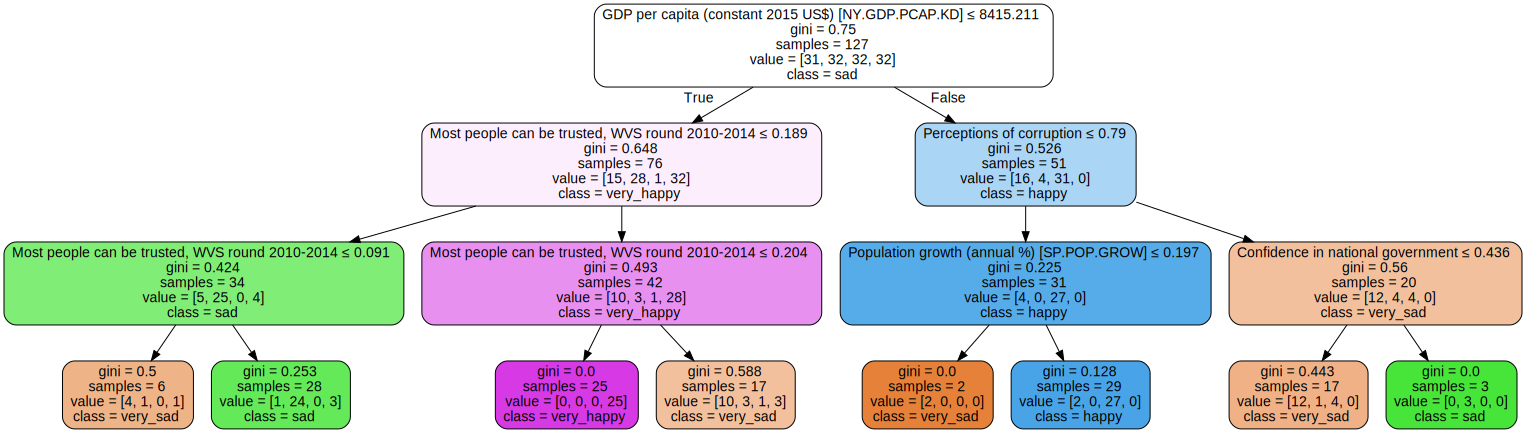

In [31]:
##Decision tree for all countries

categories = ['very_sad', 'sad','happy', 'very_happy']
#this is based off of percentiles, 25% of the data is in each bin
percentiles = [0,4.640900,5.526900,6.285475,float('Inf')]
data['Happiness category'] = pd.cut(data['Happiness score'], bins = percentiles, labels = categories)
#todo check what kmeans columns is
X = data.drop(['Happiness score','Time Code','Time','Country','Country Code' ],axis=1, inplace=False)
y = data['Happiness category']

# fill nas with the mean from the category__this is okay because we are doing explanatory analysis, not prediction
for category in categories:
  for column in X.columns.tolist():
    if column != 'Happiness category':
      means = X.loc[ X['Happiness category'] == category, column ].mean()
      X.loc[ X['Happiness category'] == category, column ] = X.loc[ X['Happiness category'] == category, column].fillna(means)
  
X.drop(['Happiness category'], axis = 1,inplace =True)
clf = tree.DecisionTreeClassifier(max_depth = 3)
clf = clf.fit(X, y)
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=X.columns, class_names=categories, filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [32]:
### Decision tree for subset of countries
high_gdp_subset = new_data[(new_data['kmeans']==2) | (new_data['kmeans']==6)]
categories = ['Happy', 'Sad']
high_gdp_subset['Happiness category'] = 'Happy'
high_gdp_subset.loc[high_gdp_subset['kmeans']==2,'Happiness category'] = 'Sad'

high_gdp_subset.head(100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,Time,Time Code,kmeans,Country Code,CO2 emissions (kg per PPP $ of GDP) [EN.ATM.CO2E.PP.GD],General government final consumption expenditure (% of GDP) [NE.CON.GOVT.ZS],Gross capital formation (% of GDP) [NE.GDI.TOTL.ZS],Gross domestic savings (% of GDP) [NY.GDS.TOTL.ZS],"Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]","Life expectancy at birth, total (years) [SP.DYN.LE00.IN]","Age dependency ratio, young (% of working-age population) [SP.POP.DPND.YG]","GDP per capita, PPP (constant 2017 international $) [NY.GDP.PCAP.PP.KD]",GDP per capita (constant 2015 US$) [NY.GDP.PCAP.KD],"Foreign direct investment, net inflows (% of GDP) [BX.KLT.DINV.WD.GD.ZS]",GDP per capita growth (annual %) [NY.GDP.PCAP.KD.ZG],Trade (% of GDP) [NE.TRD.GNFS.ZS],"Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]",Strength of legal rights index (0=weak to 12=strong) [IC.LGL.CRED.XQ],"Mortality rate, under-5 (per 1,000 live births) [SH.DYN.MORT]",Population growth (annual %) [SP.POP.GROW],Country,Year,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,"GINI index (World Bank estimate), average 2000-16","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, WVS round 2010-2014",Happiness score,Happiness category
country_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Australia,2015,YR2015,6,AUS,0.341339,18.348738,26.283154,24.796098,5.31127,82.400000,28.505729,47569.294602,56707.022077,3.472168,0.712256,41.625621,1.508367,11.0,3.9,1.439217,Australia,2015,10.690199,0.951862,72.699997,0.921871,0.323258,0.356554,0.790050,0.209637,0.478557,1.686918,0.230798,0.342750,0.416127,0.518140,7.2280,Happy
Austria,2015,YR2015,6,AUT,0.146528,19.761691,23.805526,27.555477,5.45658,81.190244,21.062160,52873.858655,44178.047378,-2.088896,-0.111540,102.427315,0.896563,4.0,3.7,1.120993,Austria,2015,10.698853,0.928110,72.099998,0.900305,0.096872,0.557480,0.798263,0.164469,0.454790,1.762817,0.249110,0.302692,0.319265,NaN,7.2460,Happy
Bahrain,2015,YR2015,2,BHR,0.489418,17.685250,25.530790,36.813835,2.67454,76.762000,27.138806,48110.734193,22634.085648,0.208993,-0.187595,154.931375,1.848627,1.0,7.6,2.642767,Bahrain,2015,10.690272,0.852551,67.699997,0.849521,0.103796,NaN,0.715543,0.302972,NaN,2.176905,0.362372,NaN,0.481303,0.335000,6.1994,Sad
Belgium,2015,YR2015,6,BEL,0.182768,23.615087,23.627950,25.045968,6.45157,80.992683,26.219321,49456.398582,40991.808138,-4.222495,1.451893,154.192547,0.561429,4.0,4.1,0.579446,Belgium,2015,10.638453,0.885209,71.400002,0.869475,0.059582,0.468785,0.805178,0.239959,0.459024,1.511811,0.218969,0.284308,0.403825,NaN,6.9230,Happy
Canada,2015,YR2015,6,CAN,0.350377,20.877825,23.821593,21.313206,NaN,81.900000,23.532498,47522.140667,43596.135537,3.853895,-0.089286,66.164902,1.125241,9.0,5.4,0.746339,Canada,2015,10.672425,0.939067,73.000000,0.931469,0.245132,0.427152,0.845328,0.286280,0.644104,1.611454,0.217389,0.336800,0.667739,NaN,7.2781,Happy
Costa Rica,2015,YR2015,6,CRI,0.091005,16.960242,18.853726,18.091480,6.87350,79.565000,32.023309,19141.683072,11642.778052,5.236395,2.531383,60.753562,0.801982,10.0,9.1,1.087099,Costa Rica,2015,9.598226,0.878273,70.699997,0.906926,-0.056339,0.761419,0.849710,0.286440,0.261169,2.263607,0.330260,0.490882,0.477598,NaN,7.1674,Happy
Czech Republic,2015,YR2015,6,CZE,0.282458,18.915254,27.983248,33.925141,5.75182,78.578049,22.595302,36168.418555,17829.698322,0.904051,5.181403,155.175663,0.309365,7.0,3.2,0.196589,Czech Republic,2015,10.328933,0.911363,68.800003,0.808484,-0.147830,0.886467,0.750774,0.206081,0.435426,1.802234,0.272734,0.264167,0.265170,NaN,6.8521,Happy
Denmark,2015,YR2015,6,DNK,0.120539,25.469199,20.631206,27.419335,NaN,80.702439,26.272523,52892.646029,53254.856370,0.611475,1.622166,104.048228,0.452034,8.0,4.1,0

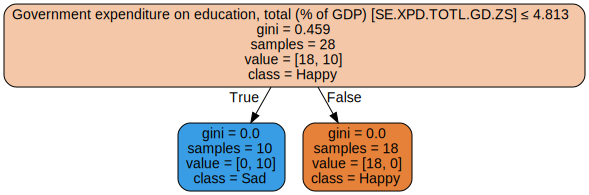

In [33]:
X = high_gdp_subset.drop(['Happiness score','Time Code','Time','Country','Country Code', 'kmeans' ],axis=1, inplace=False)
y = high_gdp_subset['Happiness category']

# fill nas with the mean from the category -> this is okay because we are doing explanatory analysis, not prediction
for category in categories:
  for column in X.columns.tolist():
    if column != 'Happiness category':
      if column == 'Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]':
        nas = X.loc[X[column].isna()]
      means = X.loc[ X['Happiness category'] == category, column ].mean()
      X.loc[ X['Happiness category'] == category, column ] = X.loc[ X['Happiness category'] == category, column].fillna(means)
  
X.drop(['Happiness category'], axis = 1,inplace =True)
clf = tree.DecisionTreeClassifier(max_depth = 3, random_state = 4)
clf = clf.fit(X, y)
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=X.columns, class_names=categories, filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

Text(0, 0.5, 'Happiness Scaore')

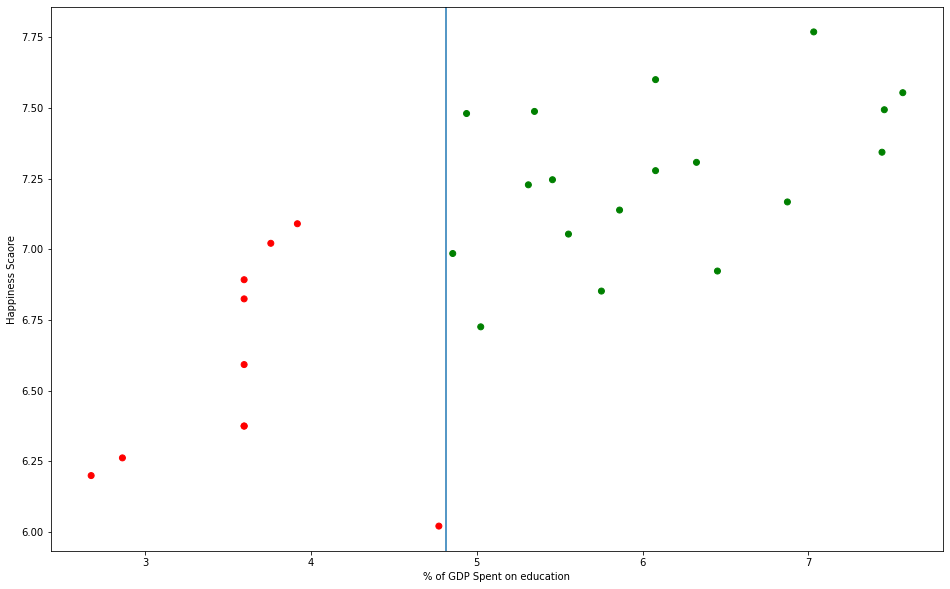

In [34]:
# set color
def pltcolor(lst):
    cols=[]
    for l in lst:
        if l=='Happy':
            cols.append('green')
        elif l=='Sad':
            cols.append('red')
    return cols
# Create the colors list using the function above
cols=pltcolor(y)

fig, ax = plt.subplots()
ax.scatter(X['Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]'], high_gdp_subset['Happiness score'], c=cols)
ax.axvline(x=4.813, ymin=0, ymax=7)
ax.set_xlabel('% of GDP Spent on education')
ax.set_ylabel('Happiness Scaore')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


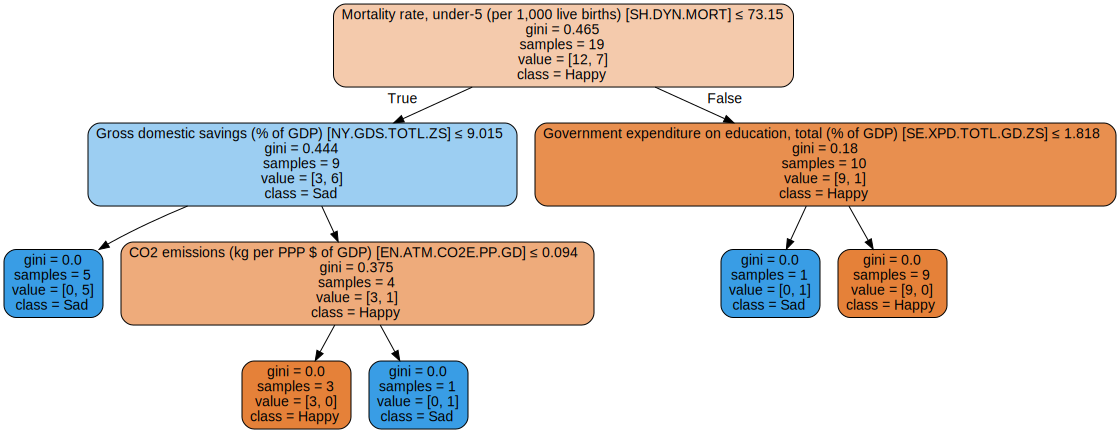

In [35]:
low_gdp_subset = new_data[(new_data['kmeans']==4) | (new_data['kmeans']==7)]
categories = ['Happy', 'Sad']
low_gdp_subset['Happiness category'] = 'Happy'
low_gdp_subset.loc[low_gdp_subset['kmeans']==7,'Happiness category'] = 'Sad'
X = low_gdp_subset.drop(['Happiness score','Time Code','Time','Country','Country Code', 'kmeans', 'Most people can be trusted, WVS round 2010-2014','GDP per capita, PPP (constant 2017 international $) [NY.GDP.PCAP.PP.KD]','GDP per capita (constant 2015 US$) [NY.GDP.PCAP.KD]' ],axis=1, inplace=False)
y = low_gdp_subset['Happiness category']

# fill nas with the mean from the category -> this is okay because we are doing explanatory analysis, not prediction
for category in categories:
  for column in X.columns.tolist():
    if column != 'Happiness category':
      means = X.loc[ X['Happiness category'] == category, column ].mean()
      X.loc[ X['Happiness category'] == category, column ] = X.loc[ X['Happiness category'] == category, column].fillna(means)
  
X.head(100)
X.drop(['Happiness category'], axis = 1,inplace =True)
clf = tree.DecisionTreeClassifier(max_depth = 3, random_state =2)
clf = clf.fit(X, y)
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=X.columns, class_names=categories, filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 
